In [1]:
from numpy import arange
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This Notebook is based on the example : [https://optimization.cbe.cornell.edu/index.php?title=Momentum]. It explains the implementation of Gradient descent with and without Momentum
# Objective Function: f(x) = x ^ 2 - 4 x + 4  

In [2]:
def objective_func(x):
    fn=0.3* np.power(x,4) - 0.1*np.power(x,3)- 2*np.power(x,2)- 0.8*x 
    return fn
def grad_func(x):
    grad= 1.2* np.power(x,3)-0.3*np.power(x,2)-4*x -0.8
    return grad



In [3]:
class Gradient_desc():
    def __init__(self, step_size=0.1, n_iter=150):
        self.step_size=step_size
        self.n_iter=n_iter
        self.x_min=None
        self.y_min=None
    
    def print_min(self):
        print(f"Global Minimum without Momentum at {np.round(self.x_min,2)} and {np.round(self.y_min,2)}")
        
    def calculate_grad_desc(self,x_init, grad_func, obj_func):
        x_optim=[]
        y_optim=[]
        for i in range(self.n_iter):
            g= grad_func(x_init)
            x_init = x_init - (self.step_size*g)
            y_result= obj_func(x_init)
            x_optim.append(x_init)
            y_optim.append(y_result)
        self.x_min= x_init
        self.y_min= y_result
        r_min,r_max=-3,3
        Gradient_desc.plot_optimization(r_min,r_max,obj_func,x_optim,y_optim)
        return   
    
    @staticmethod  
    def plot_optimization(r_min,r_max,objective_func,x_optim,y_optim):
        x = np.linspace(r_min, r_max, 1000)
        results = objective_func(x)

        plt.plot(x, results, color="blue", label="Original Function")
        plt.plot(x_optim, y_optim, color="red", label="objective_function")
        plt.legend()
        plt.show()
        return  
        


In [4]:
class Momentum_Optimization():
    def __init__(self, step_size=0.1, n_iter=150, beta=0.9):
        self.step_size=step_size
        self.n_iter=n_iter
        self.beta=beta
        self.x_min=None
        self.y_min=None
    
    def print_min(self):
        print(f"Global Minimum Momentum at {np.round(self.x_min,2)} and {np.round(self.y_min,2)}")
        
    def calculate_grad_desc(self,x_init, grad_func, obj_func):
        x_optim=[]
        y_optim=[]
        mu=0
        for i in range(self.n_iter):
            g= grad_func(x_init)
            mu = self.beta*mu + (1-self.beta)*g 
            x_init = x_init - (self.step_size*mu)
            y_result= obj_func(x_init)
            x_optim.append(x_init)
            y_optim.append(y_result)
        self.x_min= x_init
        self.y_min= y_result
        r_min,r_max=-3,3
        Momentum_Optimization.plot_optimization(r_min,r_max,obj_func,x_optim,y_optim)
        return   
    
    @staticmethod  
    def plot_optimization(r_min,r_max,objective_func,x_optim,y_optim):
        x = np.linspace(r_min, r_max, 1000)
        results = objective_func(x)

        plt.plot(x, results, color="blue", label="Original Function")
        plt.plot(x_optim, y_optim, color="red", label="objective_function")
        plt.legend()
        plt.show()
        return  
        


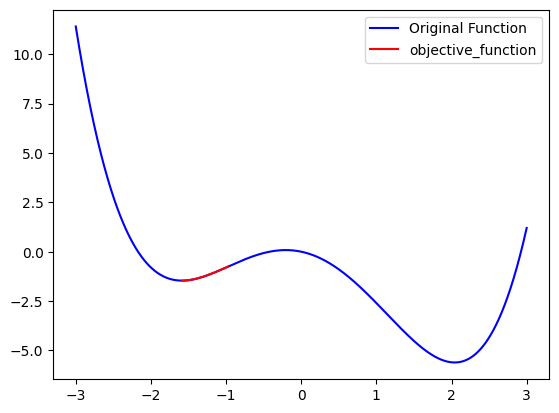

Global Minimum without Momentum at -1.59 and -1.46


In [5]:
grad_desc=Gradient_desc()
grad_desc.calculate_grad_desc(-2.8,grad_func,objective_func) 
grad_desc.print_min()

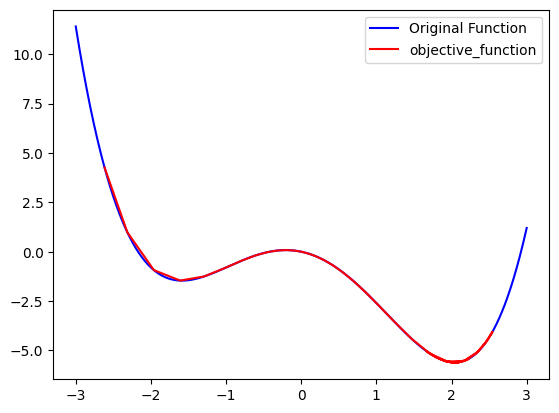

Global Minimum Momentum at 2.04 and -5.61


In [6]:
moment_optim=Momentum_Optimization()
moment_optim.calculate_grad_desc(-2.8,grad_func,objective_func) 
moment_optim.print_min()